In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import healpy as hp
import rubin_sim.maf as maf

In [238]:
families = maf.get_family_descriptions('runs_v2.2.json')
family_list = families.index.values

summary_source = 'summary_2022_11_16.csv'
summaries = maf.get_metric_summaries(summary_source=summary_source)
new = maf.get_metric_summaries(summary_source='draft3_summary.csv')

remap_columns = False # do this if there's a mix
# Set SN metric names back to previous versions
exccols = [m for m in new if "DDF excluded" in m and 'NSN' in m]
oldexcols = [m.replace(' DDF excluded', ' ') for m in exccols]
onlycols = [m for m in new if ", only DDF observations" in m and "NSN" in m]
oldonlycols = [m.replace(', only DDF observations', '') for m in onlycols]
if remap_columns: 
    d = new.copy()
    for ec, uc in zip(exccols, oldexcols):
        rii = np.where(np.isnan(new[uc]))
        d[uc].iloc[rii] = new[ec].iloc[rii]
    d.drop(exccols, axis=1, inplace=True)
    for ec, uc in zip(onlycols, oldonlycols):
        rii = np.where(np.isnan(new[uc]))
        d[uc].iloc[rii] = new[ec].iloc[rii]
    d.drop(onlycols, axis=1, inplace=True)
    new = d
else: # do this is just a swap
    mapper = dict(zip(exccols, oldexcols))
    new.rename(mapper, axis=1, inplace=True)
    mapper = dict(zip(onlycols, oldonlycols))
    new.rename(mapper, axis=1, inplace=True)
    
metrics_source = 'metric_sets.json'
metric_sets = maf.get_metric_sets(metrics_source)

# list the metric sets
msets = list(metric_sets.groupby('metric set').first().index)

In [239]:
# drop_metrics = [m for m in franken_summaries if 'Completeness@Time' in m]
newmetrics = list(metric_sets.loc['SSO discovery']['metric'].values)
oldmetrics = []
for n in newmetrics:
    hval = n.split("H<=")[-1]
    objtype = n.split('loss ')[-1].split(' H')[0]
    kk = f"CumulativeCompleteness H <= {hval}"
    kk2 = f"{objtype} 3 pairs in 15 nights detection loss"
    oldmetrics += [m for m in new if kk in m and kk2 in m]
mapper = dict(zip(oldmetrics, newmetrics))
new.rename(mapper, axis=1, inplace=True)
newmetrics = list(metric_sets.loc['SSO lightcurve inversion']['metric'].values)
oldmetrics = []
for n in newmetrics:
    hval = n.split("H=")[-1]
    objtype = n.split('Inversion ')[-1].split(' H')[0]
    oldmetrics += [m for m in new if f"FractionPop Lightcurve Inversion H = {hval}" in m
                  and objtype in m]
mapper = dict(zip(oldmetrics, newmetrics))
new.rename(mapper, axis=1, inplace=True)

In [240]:
new.index.values

array(['draft3_ddfper4.0uz_v2.99_10yrs',
       'draft3_ddfper4.0uzy_v2.99_10yrs',
       'draft3_ddfper4.5uz_v2.99_10yrs',
       'draft3_ddfper4.5uzy_v2.99_10yrs',
       'draft3_ddfper5.0uz_v2.99_10yrs',
       'draft3_ddfper5.0uzy_v2.99_10yrs',
       'draft3_ddfper5.5uz_v2.99_10yrs',
       'draft3_ddfper5.5uzy_v2.99_10yrs',
       'draft3_ddfper6.0uz_v2.99_10yrs',
       'draft3_ddfper6.0uzy_v2.99_10yrs',
       'draft3_ddfper6.5uz_v2.99_10yrs',
       'draft3_ddfper6.5uzy_v2.99_10yrs',
       'draft3_ddfper7.0uz_v2.99_10yrs',
       'draft3_ddfper7.0uzy_v2.99_10yrs',
       'draft3_ddfper7.5uz_v2.99_10yrs',
       'draft3_ddfper7.5uzy_v2.99_10yrs',
       'draft3_ddfper8.0uz_v2.99_10yrs',
       'draft3_ddfper8.0uzy_v2.99_10yrs'], dtype=object)

In [241]:
these_runs = list(new.index.values)
ddf = [float(r.split('ddfper')[-1].split('u')[0]) for r in these_runs]
ddf = list(set(ddf))
ddf.sort()
runorder = []
for d in ddf:
    kk = f'ddfper{d}'
    runorder += [r for r in these_runs if kk in r and 'uzy' not in r]
for d in ddf:
    kk = f'ddfper{d}'
    runorder += [r for r in these_runs if kk in r and 'uzy' in r]
runorder
these_runs = runorder
#runorder

In [242]:
new.loc[these_runs, ['Median NVisits WFD all bands HealpixSubsetSlicer']]

metric                           Median NVisits WFD all bands HealpixSubsetSlicer
run                                                                              
draft3_ddfper4.0uz_v2.99_10yrs                                              829.0
draft3_ddfper4.5uz_v2.99_10yrs                                              827.0
draft3_ddfper5.0uz_v2.99_10yrs                                              824.0
draft3_ddfper5.5uz_v2.99_10yrs                                              821.0
draft3_ddfper6.0uz_v2.99_10yrs                                              818.0
draft3_ddfper6.5uz_v2.99_10yrs                                              816.0
draft3_ddfper7.0uz_v2.99_10yrs                                              813.0
draft3_ddfper7.5uz_v2.99_10yrs                                              811.0
draft3_ddfper8.0uz_v2.99_10yrs                                              809.0
draft3_ddfper4.0uzy_v2.99_10yrs                                             825.0
draft3_ddfper4.5uzy_v2.99_10yrs                                             823.0
draft3_ddfper5.0uzy_v2.99_10yrs                                             819.0
draft3_ddfper5.5uzy_v2.99_10yrs                                             817.0
draft3_ddfper6.0uzy_v2.99_10yrs                                             814.0
draft3_ddfper6.5uzy_v2.99_10yrs                                             811.0
draft3_ddfper7.0uzy_v2.99_10yrs                                             809.0
draft3_ddfper7.5uzy_v2.99_10yrs                                             807.0
draft3_ddfper8.0uzy_v2.99_10yrs                                             804.0

(3.5, 8.5)

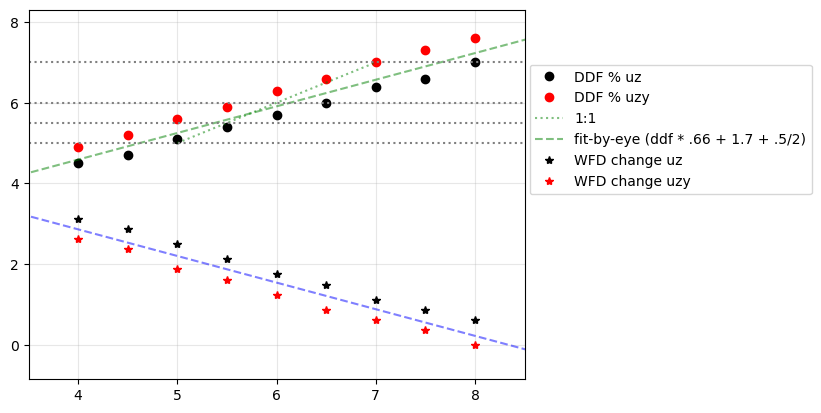

In [243]:
d = pd.DataFrame(new.loc[these_runs, 'Nvisits DDF']/new.loc[these_runs, 'Nvisits All visits'],
        columns=['Fraction DDF']).round(3)
plt.plot(ddf, d['Fraction DDF'][0:len(ddf)]*100, 'ko', label='DDF % uz')
plt.plot(ddf, d['Fraction DDF'][len(ddf):]*100, 'ro', label='DDF % uzy')
plt.plot(x, x, 'g:', alpha=0.5, label='1:1')
x = np.arange(0, 10)
plt.plot(x, (x*0.66 + 1.7 + 0.5/2), 'g--', alpha=0.5, label='fit-by-eye (ddf * .66 + 1.7 + .5/2)')
plt.grid(alpha=0.3)
d = new.loc[these_runs, ['Median NVisits WFD all bands HealpixSubsetSlicer']] 
#d = d/new.loc['draft3_ddfper4.0uz_v2.99_10yrs', 'Median NVisits WFD all bands HealpixSubsetSlicer']
d = (d - d.iloc[-1])/ d.iloc[-1] * 100 
plt.plot(ddf, d['Median NVisits WFD all bands HealpixSubsetSlicer'][0:len(ddf)], 'k*', label='WFD change uz')
plt.plot(ddf, d['Median NVisits WFD all bands HealpixSubsetSlicer'][len(ddf):], 'r*', label='WFD change uzy')
plt.plot(x, (x*-0.66  + 5.5), 'b--', alpha=0.5)
plt.axhline(5.0, color='gray', linestyle=':')
plt.axhline(5.5, color='gray', linestyle=':')
plt.axhline(6, color='gray', linestyle=':')
plt.axhline(7, color='gray', linestyle=':')
plt.legend(loc=(1.01, 0.5))
plt.xlim(3.5, 8.5)
#d

So the ddf percent is different in uzy vs. uz runs (because the sequences are different lengths depending on whether it is taken with z band or y band ..  or u band). 
Also, the percent we put into the configuration for pre-scheduled DDFs doesn't end up being the percent of time taken by the DDF (because missed sequences can be made up, but often aren't, especially if the scheduling is particularly heavy with new sequences for either the same or a different field).

The SCOC asked for simulations with the DDF percentage at 5.5 and 6%, to go with other simulations at 7%. 
Since the DDF sequences themselves are slightly different in this set of runs compared with draft2, while other parameters are the same, it's likely best to pull the best matches for 3 of these from this set of runs.

We do see that the visits from the DDF are reflected in the WFD median visit per pointing. 

(3.5, 8.5)

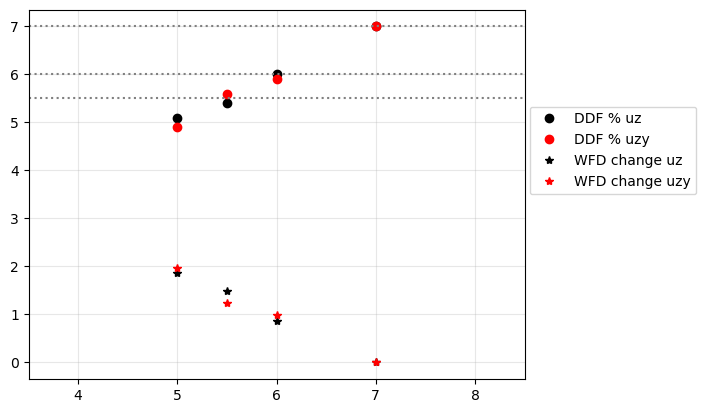

In [244]:
draft_ddf = ['draft3_ddfper5.0uz_v2.99_10yrs', 'draft3_ddfper4.0uzy_v2.99_10yrs',
             'draft3_ddfper5.5uz_v2.99_10yrs', 'draft3_ddfper5.0uzy_v2.99_10yrs', # 5.5 percent
             'draft3_ddfper6.5uz_v2.99_10yrs', 'draft3_ddfper5.5uzy_v2.99_10yrs', # 6 percent
             'draft3_ddfper8.0uz_v2.99_10yrs', 'draft3_ddfper7.0uzy_v2.99_10yrs']

d = pd.DataFrame(new.loc[draft_ddf, 'Nvisits DDF']/new.loc[draft_ddf, 'Nvisits All visits'],
        columns=['Fraction DDF']).round(3)
x = np.array([5.0, 5.0, 5.5, 5.5, 6.0, 6.0, 7.0, 7.0])
plt.plot(x[::2], d['Fraction DDF'][::2]*100, 'ko', label='DDF % uz')
plt.plot(x[1::2], d['Fraction DDF'][1::2]*100, 'ro', label='DDF % uzy')
plt.grid(alpha=0.3)
d = new.loc[draft_ddf, ['Median NVisits WFD all bands HealpixSubsetSlicer']] 
#d = d/new.loc['draft3_ddfper4.0uz_v2.99_10yrs', 'Median NVisits WFD all bands HealpixSubsetSlicer']
d = (d - d.iloc[-1])/ d.iloc[-1] * 100 
plt.plot(x[::2], d['Median NVisits WFD all bands HealpixSubsetSlicer'][::2], 'k*', label='WFD change uz')
plt.plot(x[1::2], d['Median NVisits WFD all bands HealpixSubsetSlicer'][1::2], 'r*', label='WFD change uzy')
plt.axhline(5.5, color='gray', linestyle=':')
plt.axhline(6, color='gray', linestyle=':')
plt.axhline(7, color='gray', linestyle=':')
plt.legend(loc=(1.01, 0.5))
plt.xlim(3.5, 8.5)

In [248]:
# Combine draft2 and the subset of 6 new draft3 runs
baseline_run = 'baseline_v2.2_10yrs' 
old_runs = ['baseline_v2.2_10yrs', 'draft2_rw0.9_uz_v2.99_10yrs', 'draft2_rw0.9_v2.99_10yrs'] 
dd = pd.concat([summaries.loc[old_runs], new.loc[draft_ddf]], join='inner')
summaries = dd
summaries

metric                           fOArea fO  HealpixSlicer  \
run                                                         
baseline_v2.2_10yrs                          10569.224874   
draft2_rw0.9_uz_v2.99_10yrs                   2921.581179   
draft2_rw0.9_v2.99_10yrs                      2368.486667   
draft3_ddfper5.0uz_v2.99_10yrs                4839.367158   
draft3_ddfper4.0uzy_v2.99_10yrs               5270.764092   
draft3_ddfper5.5uz_v2.99_10yrs                4384.470003   
draft3_ddfper5.0uzy_v2.99_10yrs               4159.539306   
draft3_ddfper6.5uz_v2.99_10yrs                3408.371493   
draft3_ddfper5.5uzy_v2.99_10yrs               3700.445682   
draft3_ddfper8.0uz_v2.99_10yrs                2154.466787   
draft3_ddfper7.0uzy_v2.99_10yrs               2324.004104   

metric                           fOArea/benchmark fO  HealpixSlicer  \
run                                                                   
baseline_v2.2_10yrs                                        0.587179   
draft2_rw0.9_uz_v2.99_10yrs                                0.162310   
draft2_rw0.9_v2.99_10yrs                                   0.131583   
draft3_ddfper5.0uz_v2.99_10yrs                             0.268854   
draft3_ddfper4.0uzy_v2.99_10yrs                            0.292820   
draft3_ddfper5.5uz_v2.99_10yrs                             0.243582   
draft3_ddfper5.0uzy_v2.99_10yrs                            0.231086   
draft3_ddfper6.5uz_v2.99_10yrs                             0.189354   
draft3_ddfper5.5uzy_v2.99_10yrs                            0.205580   
draft3_ddfper8.0uz_v2.99_10yrs                             0.119693   
draft3_ddfper7.0uzy_v2.99_10yrs                            0.129111   

metric                           fONv MedianNvis fO  HealpixSlicer  \
run                                                                  
baseline_v2.2_10yrs                                          830.0   
draft2_rw0.9_uz_v2.99_10yrs                                  795.0   
draft2_rw0.9_v2.99_10yrs                                     791.0   
draft3_ddfper5.0uz_v2.99_10yrs                               807.0   
draft3_ddfper4.0uzy_v2.99_10yrs                              809.0   
draft3_ddfper5.5uz_v2.99_10yrs                               804.0   
draft3_ddfper5.0uzy_v2.99_10yrs                              803.0   
draft3_ddfper6.5uz_v2.99_10yrs                               799.0   
draft3_ddfper5.5uzy_v2.99_10yrs                              800.0   
draft3_ddfper8.0uz_v2.99_10yrs                               790.0   
draft3_ddfper7.0uzy_v2.99_10yrs                              791.0   

metric                           fONv MinNvis fO  HealpixSlicer  \
run                                                               
baseline_v2.2_10yrs                                       779.0   
draft2_rw0.9_uz_v2.99_10yrs                               747.0   
draft2_rw0.9_v2.99_10yrs                                  744.0   
draft3_ddfper5.0uz_v2.99_10yrs                            759.0   
draft3_ddfper4.0uzy_v2.99_10yrs                           762.0   
draft3_ddfper5.5uz_v2.99_10yrs                            757.0   
draft3_ddfper5.0uzy_v2.99_10yrs                           756.0   
draft3_ddfper6.5uz_v2.99_10yrs                            753.0   
draft3_ddfper5.5uzy_v2.99_10yrs                           752.0   
draft3_ddfper8.0uz_v2.99_10yrs                            744.0   
draft3_ddfper7.0uzy_v2.99_10yrs                           743.0   

metric                           fONv/benchmark MedianNvis fO  HealpixSlicer  \
run                                                                            
baseline_v2.2_10yrs                                                 1.006061   
draft2_rw0.9_uz_v2.99_10yrs                                         0.963636   
draft2_rw0.9_v2.99_10yrs                                            0.958788   
draft3_ddfper5.0uz_v2.99_10yrs                                      0.978182   
draft3_ddfper4.0uzy

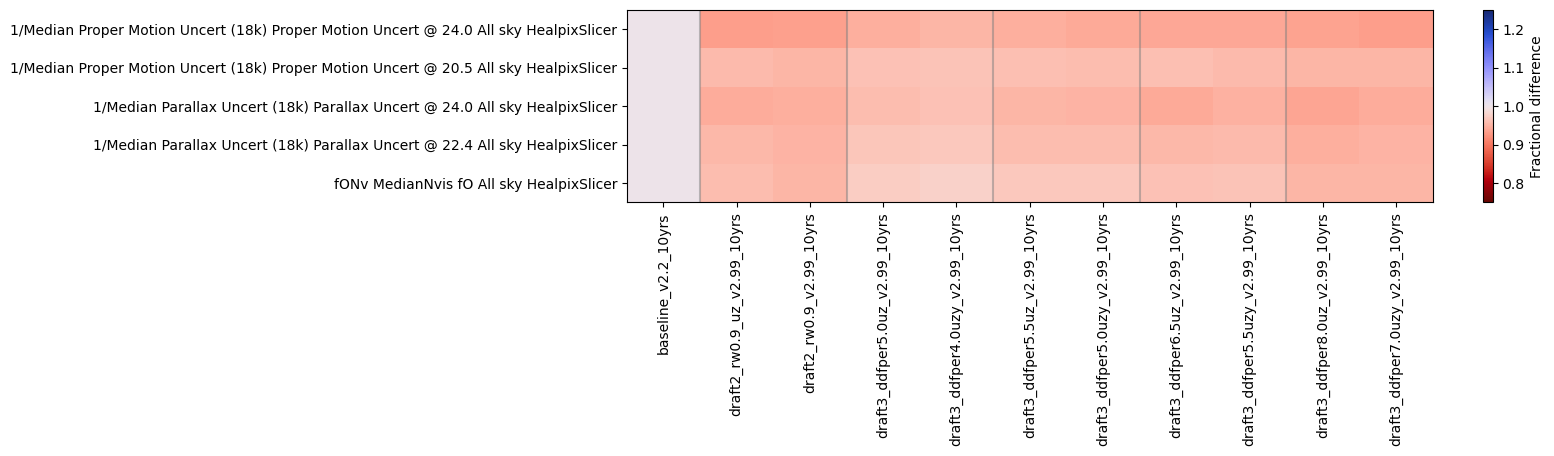

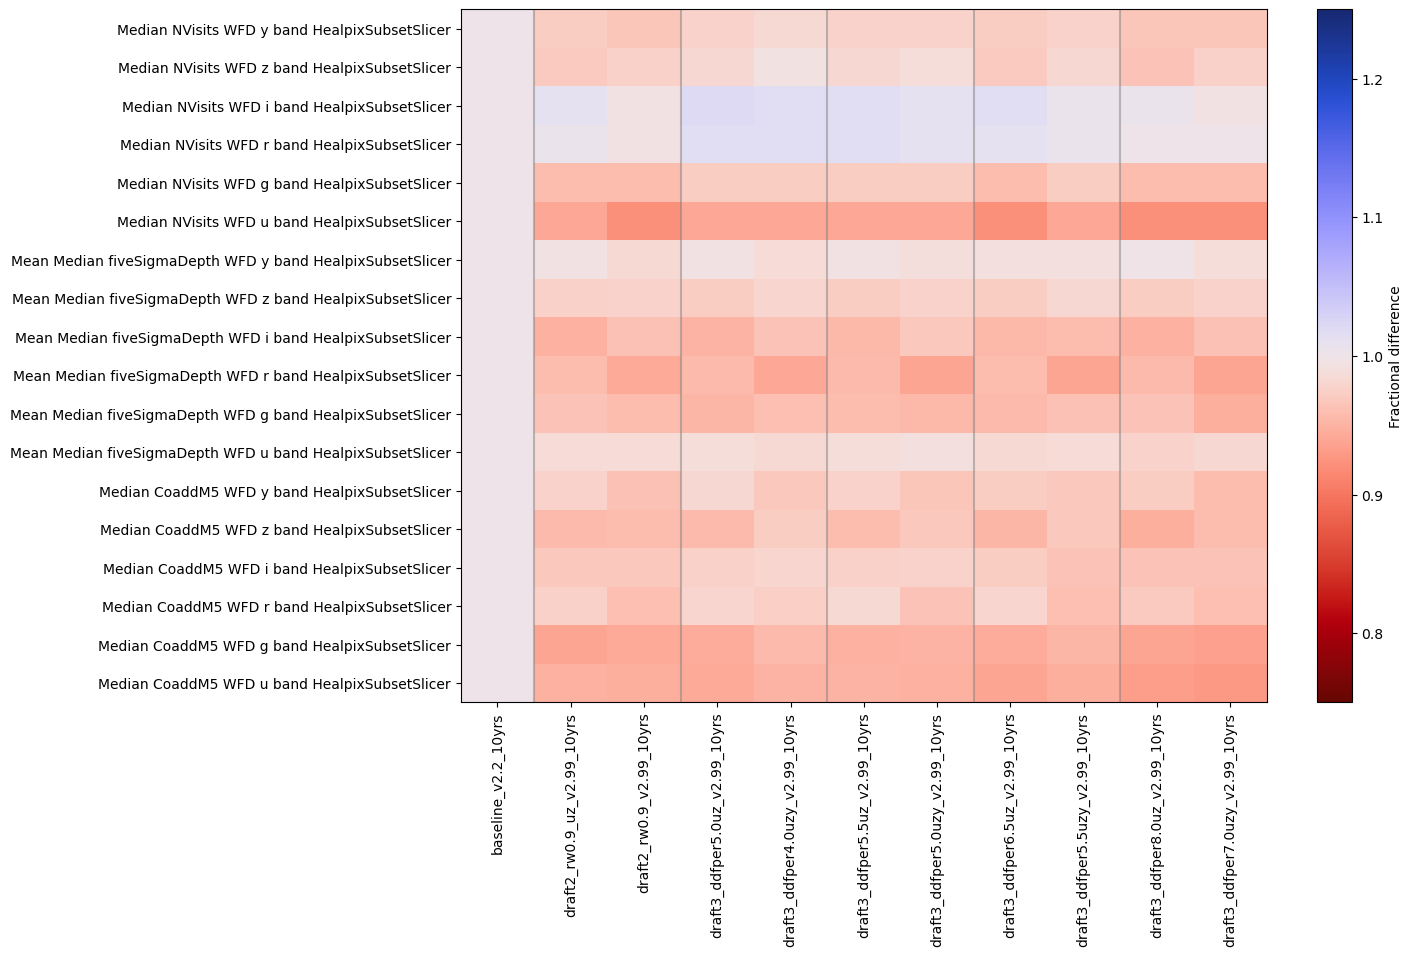

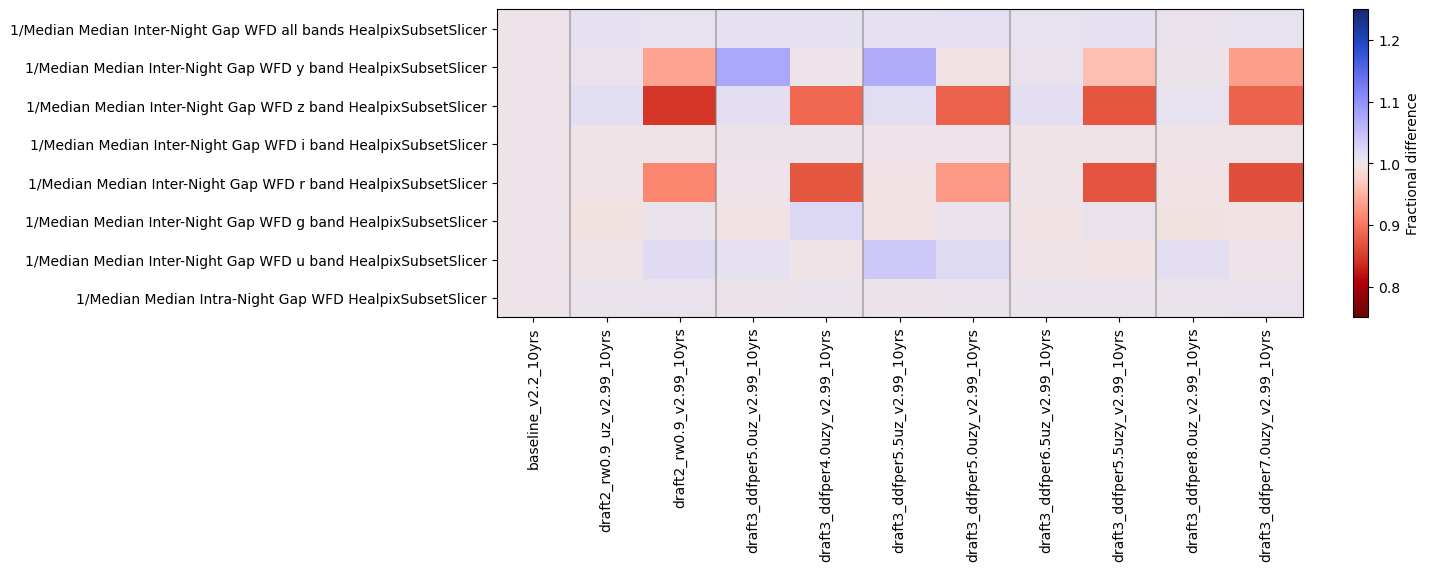

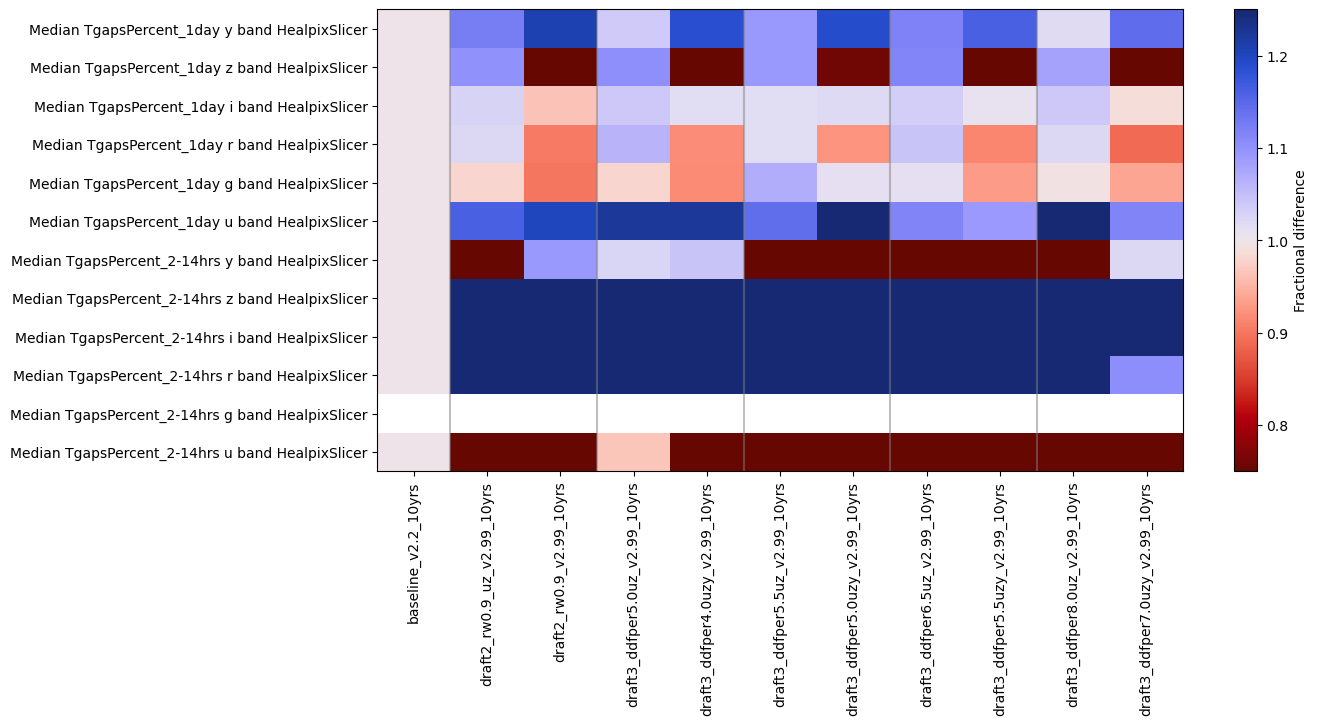

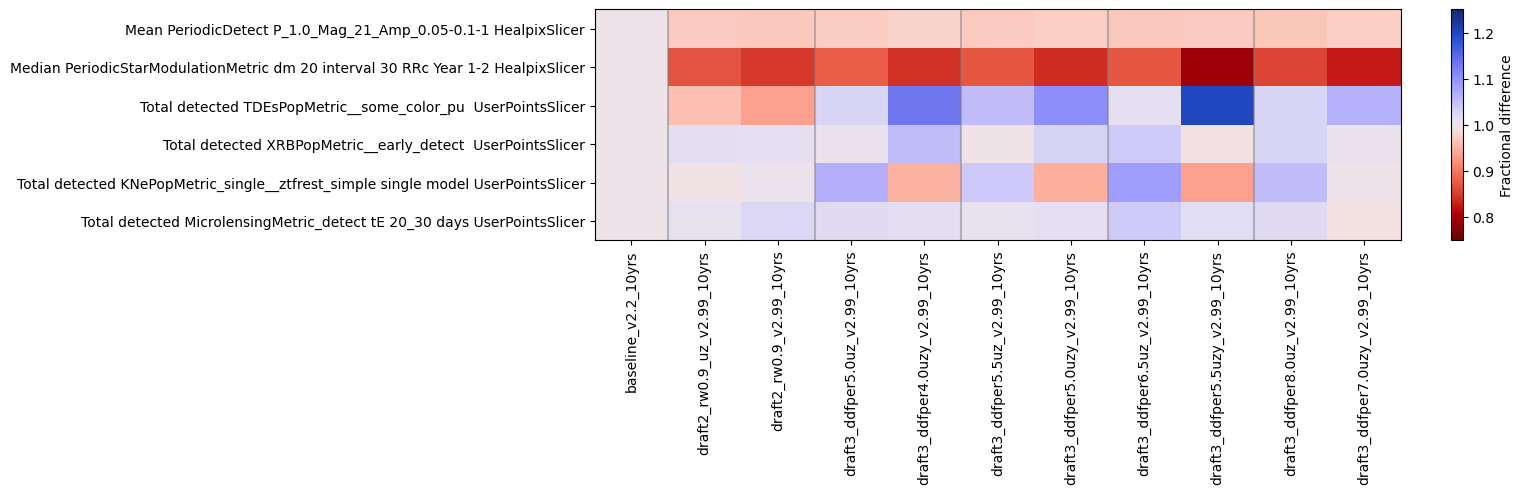

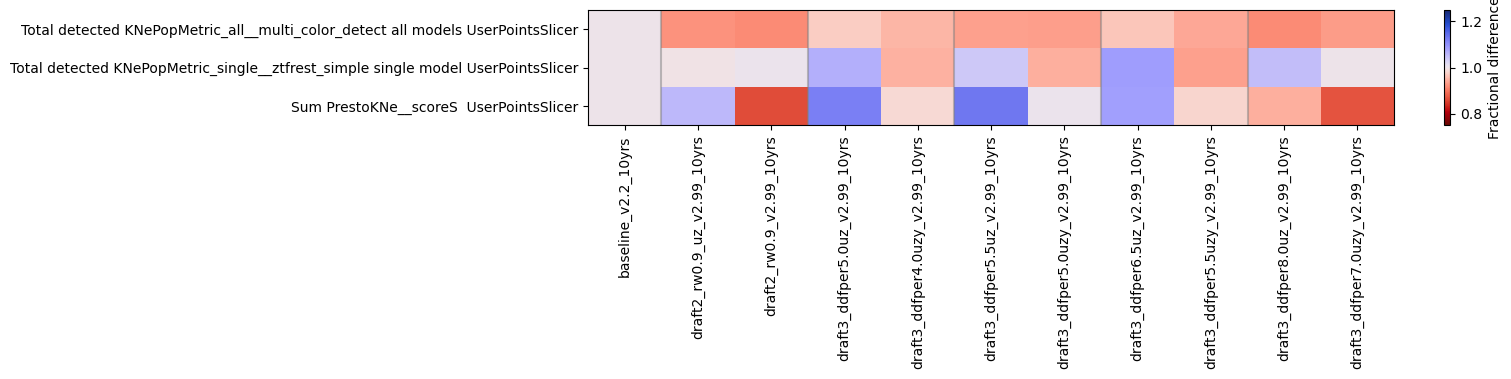

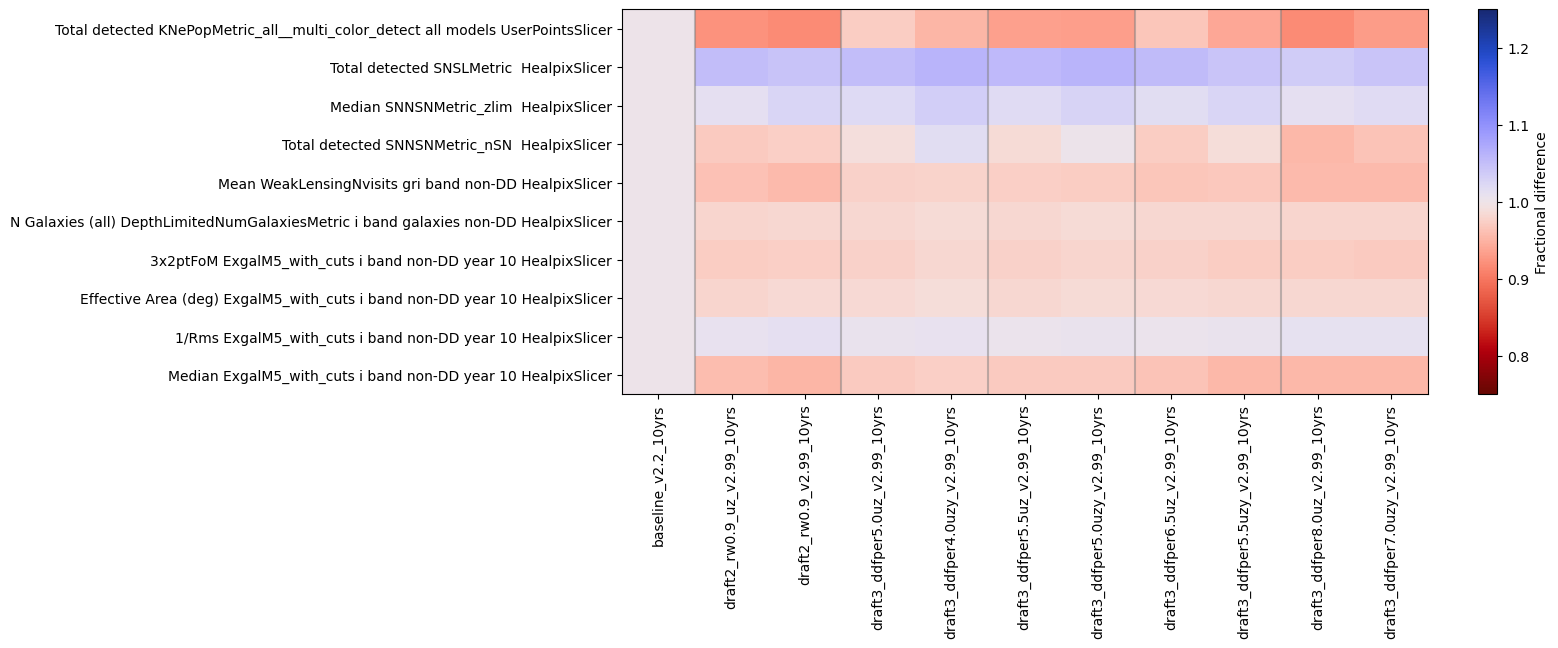

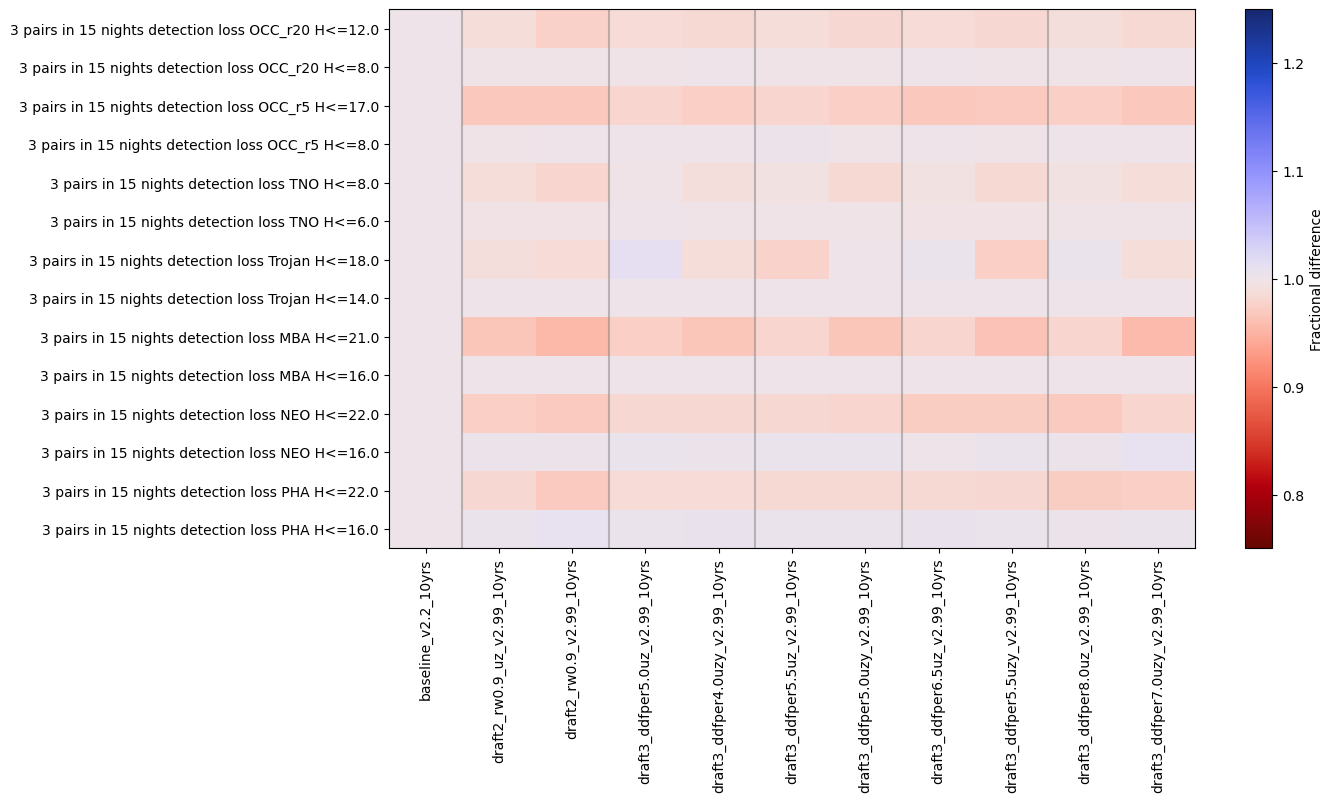

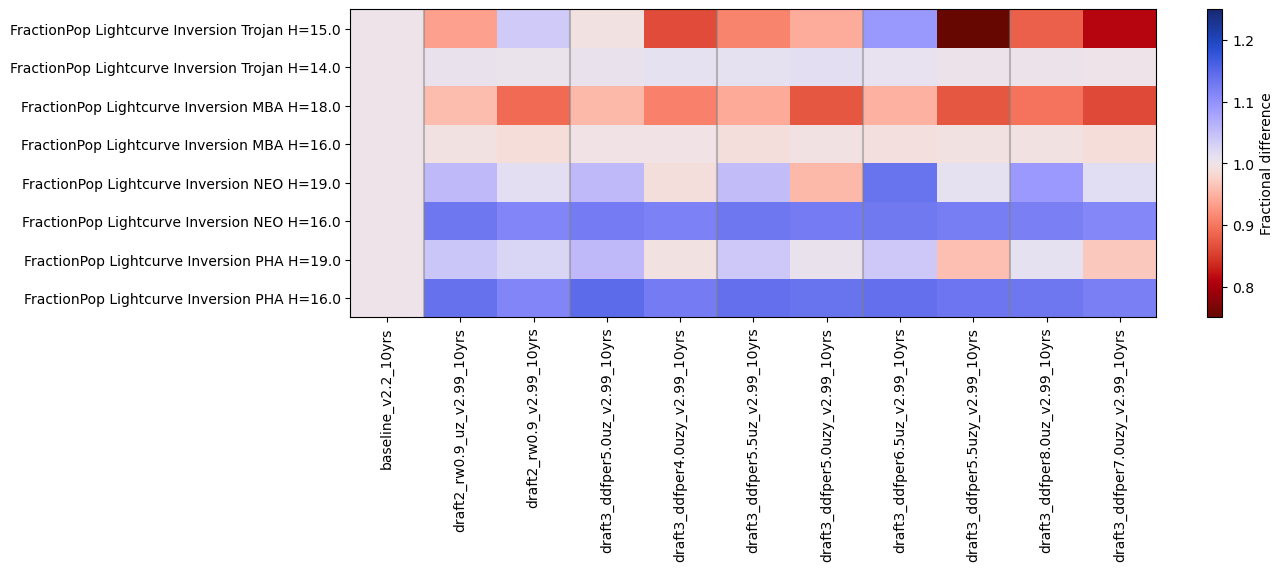

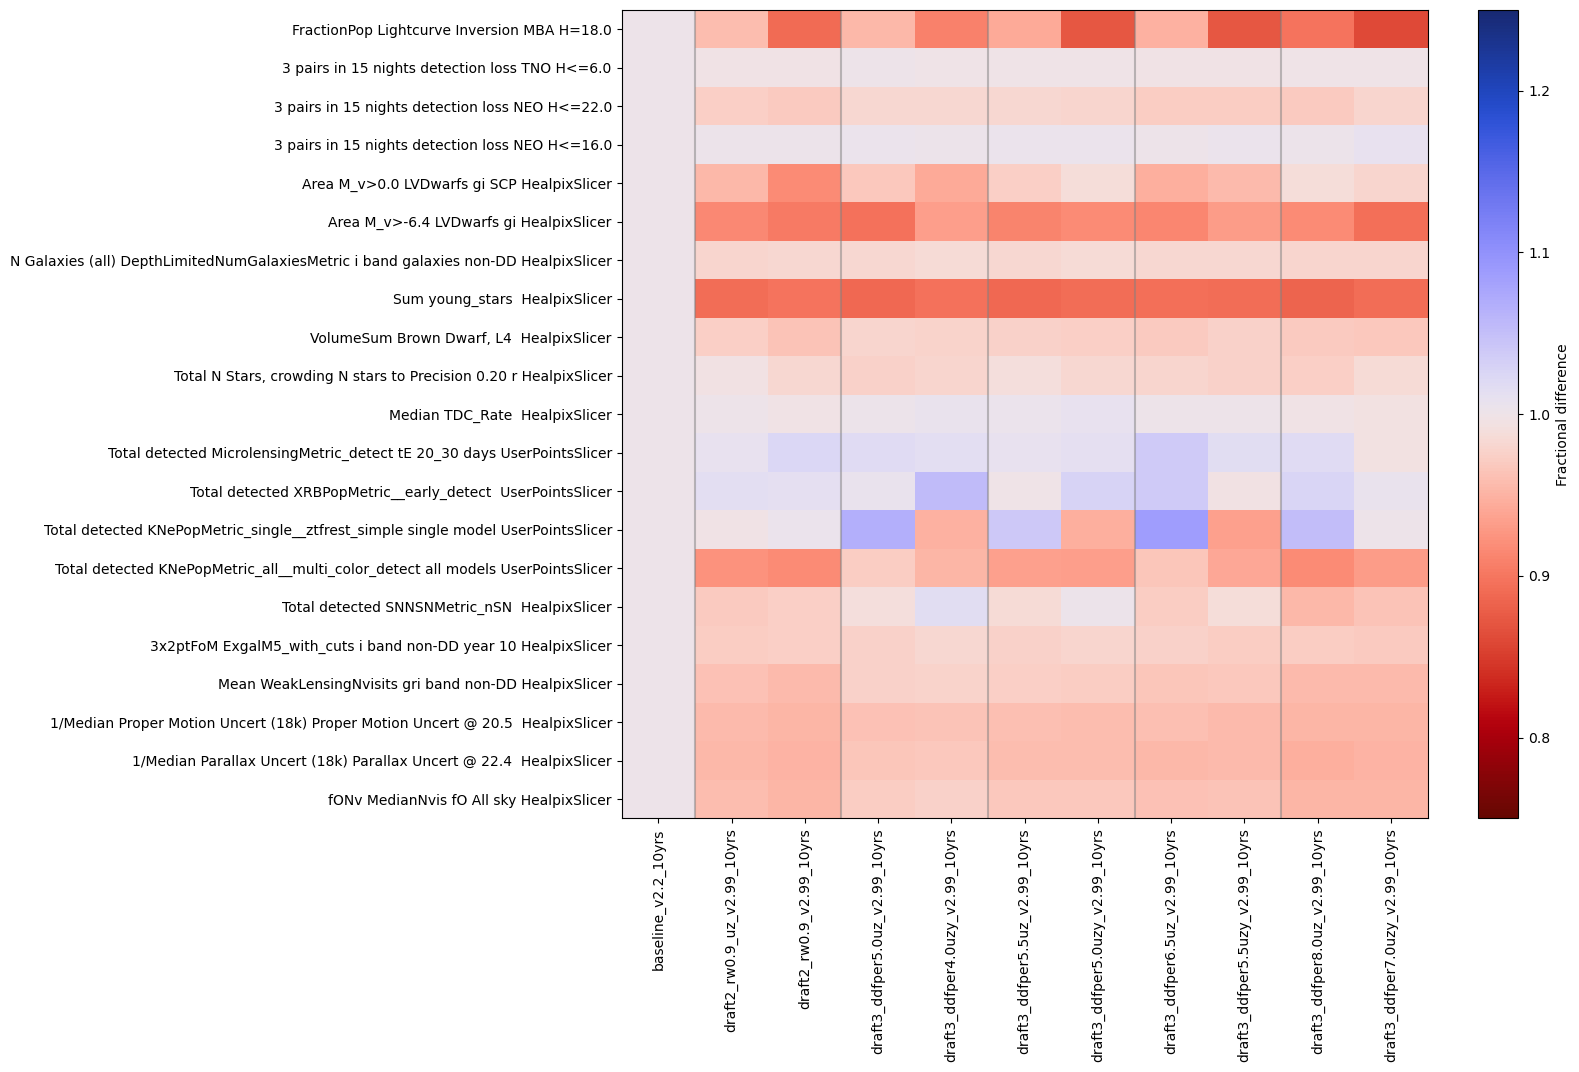

In [251]:
baseline_run = 'draft3_ddfper5.0uz_v2.99_10yrs'
baseline_run = 'baseline_v2.2_10yrs'
        
these_runs = old_runs + draft_ddf
lines = [1, 3, 5, 7, 9]

for k in ['SRD', 'WFD Depths', 'cadence', 'TVS Tgaps', 'TVS short', 'TVS KNe short',
      'DESC WFD', 'SSO discovery', 'SSO lightcurve inversion', 'SCOC']:
    msub = metric_sets.loc[k]
    fig, ax = maf.plot_run_metric_mesh(summaries.loc[these_runs,msub['metric']], 
                                   baseline_run=baseline_run,
                                   #metric_label_map=msub['short_name'],
                                   metric_set=msub,
                                  color_range=0.5)
    fig.set_figwidth(13)
    fig.set_figheight(len(msub)*.5)
    for l in lines:
        plt.axvline(l, color='gray', alpha=0.5)

The comparison of these runs shows pretty clearly the difference induced by bringing in uzy swaps instead of simple uz. This is, I believe, primarily due to shifting visits around slightly in time (by one or two visits -- see the "Depth and Seeing" notebook which takes a detour to explore this).  
It's also worth noting that I believe much of this shifting is tied to how the pairs occur across filters -- and this may be primarily being influenced by z/i pairs occuring during twilight time. We should experiment with removing this particular pairing during twilight to see if it again moves visits across the lunar cycle. 
However it's also curious that several metrics do slightly better with DDFs having 6% of DDF time rather than 5.5% of the time - some of these metrics are spatially determined, so let's compare the spatial coverage. 

In [252]:
opsdb = {}
#t = families.explode(['run', 'filepath']).loc['draft v3', ['run', 'filepath']].set_index('run')
ddir = '/Users/lynnej/opsim/'
for r in draft_ddf:
    fpath = os.path.join(ddir, 'fbs_3.0',  r + '.db') #t.loc[r, 'filepath'])
    if os.path.isfile(fpath):
        opsdb[r] = fpath
    else:
        print(f'No file at {fpath}')
t = families.explode(['run', 'filepath']).loc['baseline', ['run', 'filepath']].set_index('run')
for r in ['baseline_v2.2_10yrs']:
    fpath = os.path.join(ddir, t.loc[r, 'filepath'])    
    if os.path.isfile(fpath):
        opsdb[r] = fpath
    else:
        print(f'No file at {fpath}')

In [255]:
outDir = 'draft_temp'
nside=64
bundles = {}
filterlist, colors, orders, sqls, info_labels = maf.filterList(all=True)

recalculate = False

metric = maf.CountMetric(col='observationStartMJD', metricName='Nvisits')
s = maf.HealpixSlicer(nside=nside)
for r in draft_ddf:
    bundles[r] = {}
    for f in filterlist:        
        bundles[r][f] = maf.MetricBundle(metric, s, sqls[f], info_label=info_labels[f], runName=r)
    if recalculate:
        g = maf.MetricBundleGroup(bundles[r], opsdb[r], outDir=outDir)
        g.runAll()
    else:
        for f in filterlist:
            bundles[r][f].read(os.path.join(outDir, bundles[r][f].fileRoot + '.npz'))

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSID

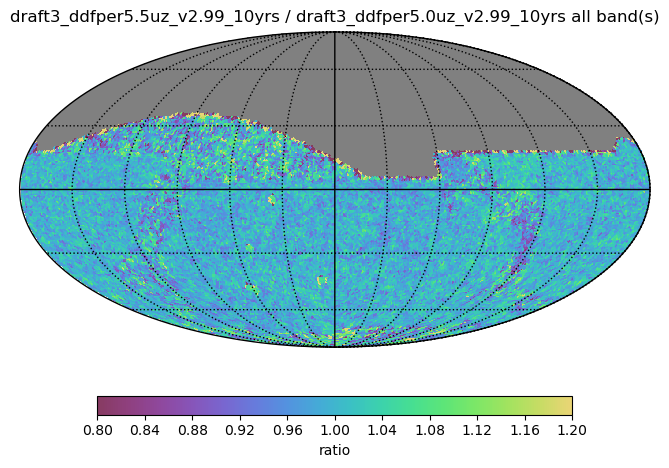

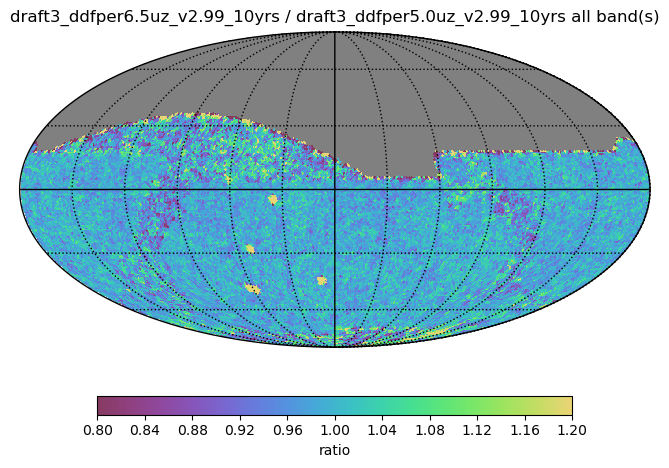

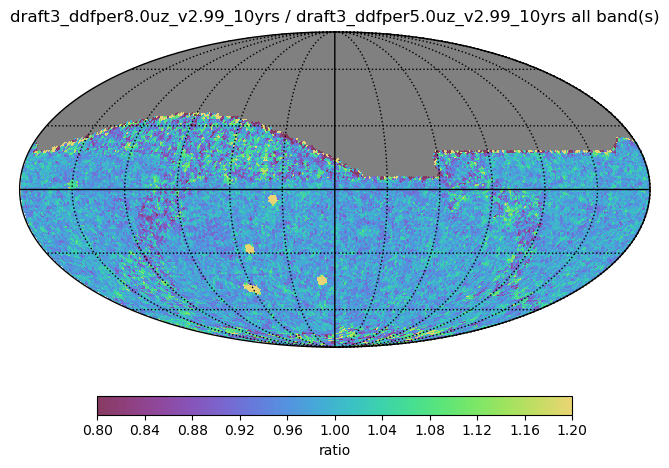

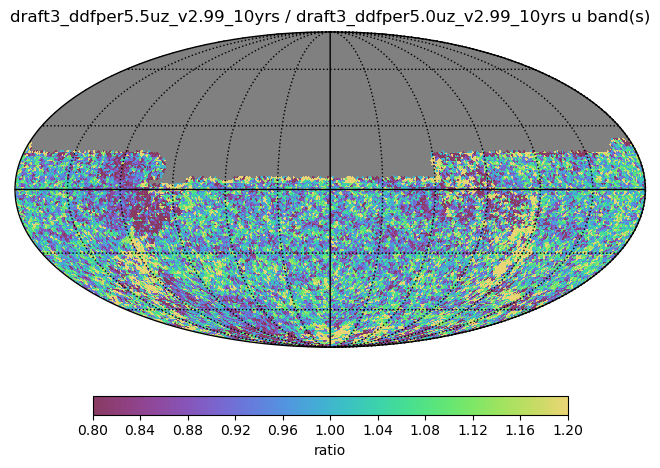

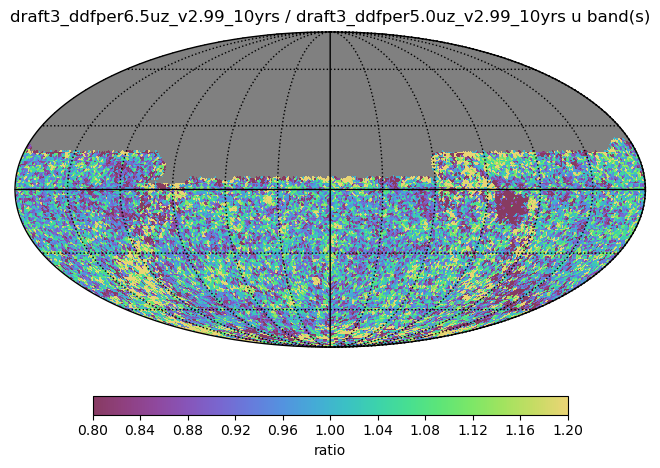

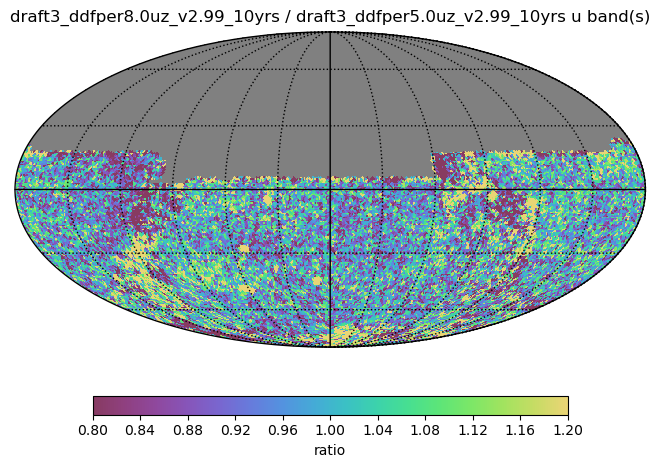

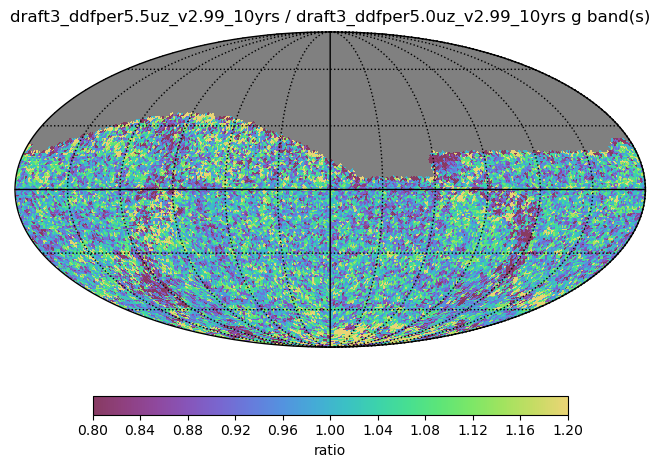

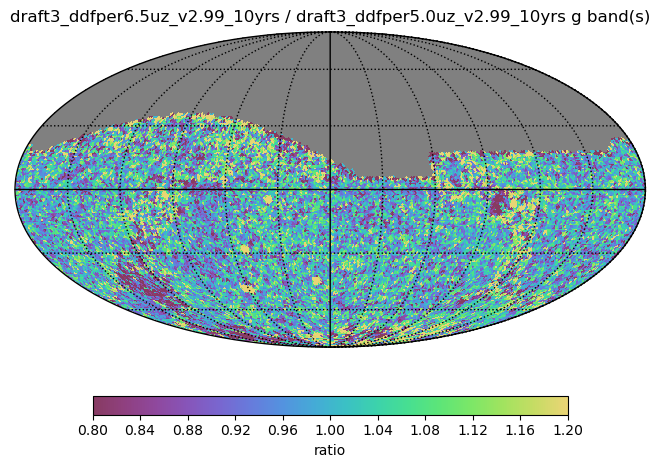

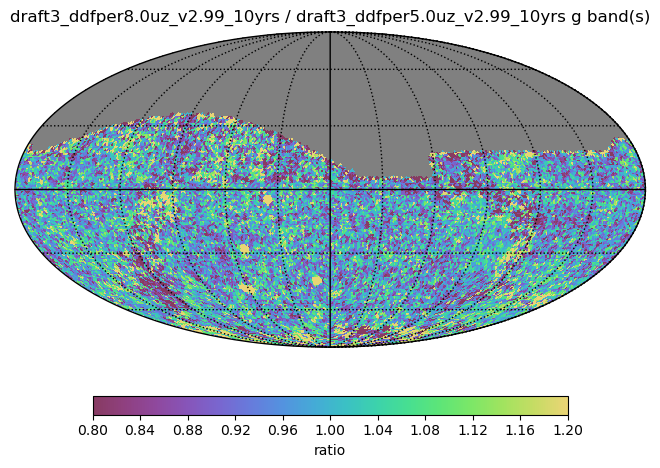

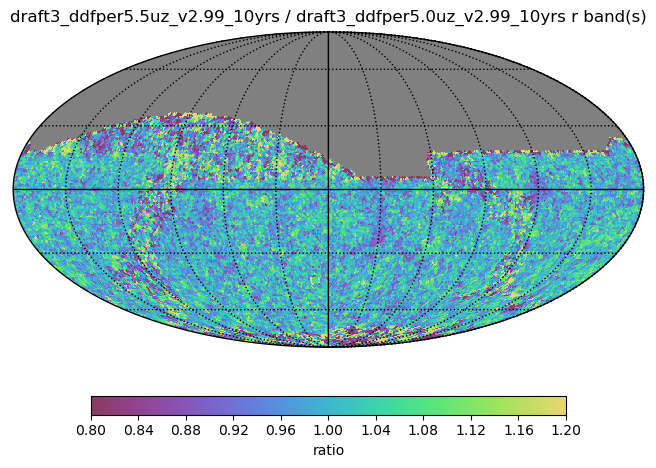

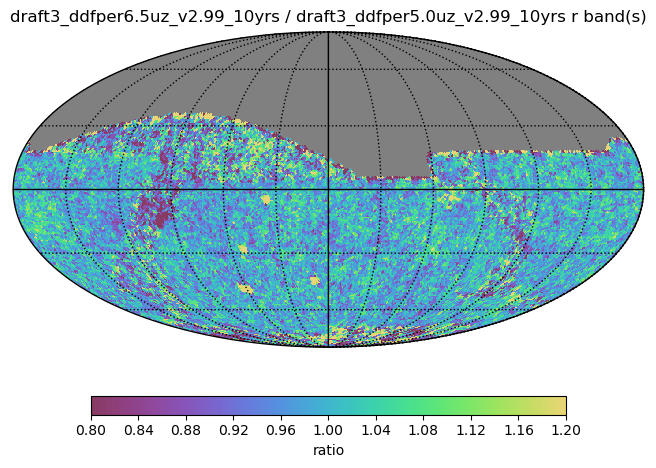

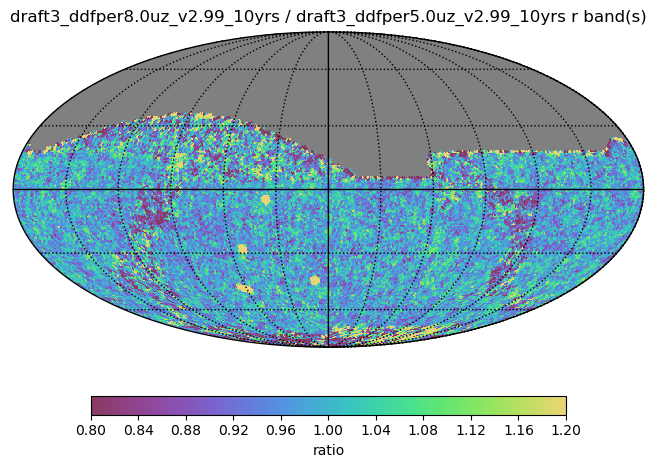

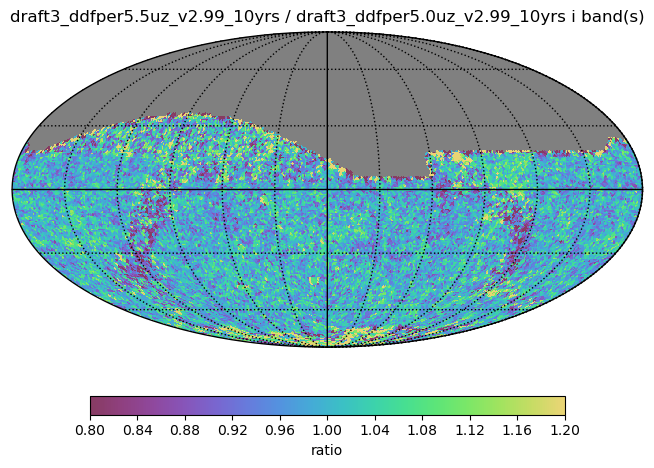

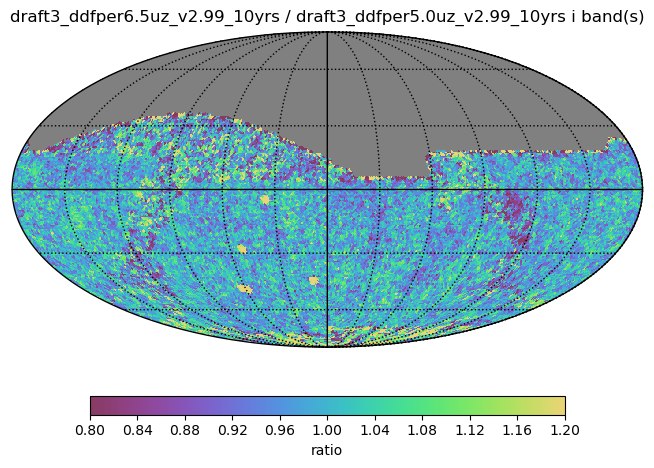

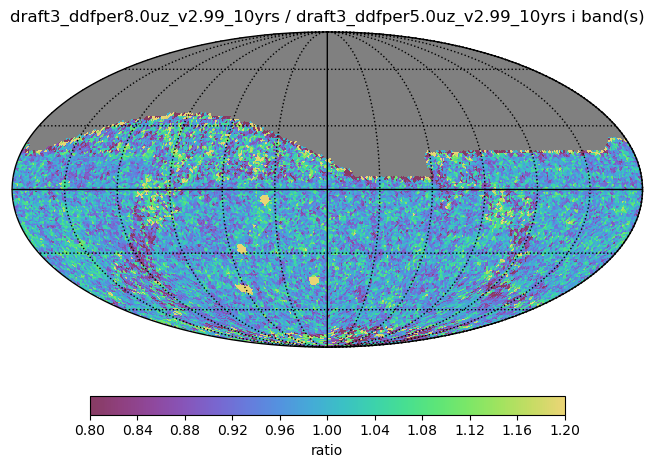

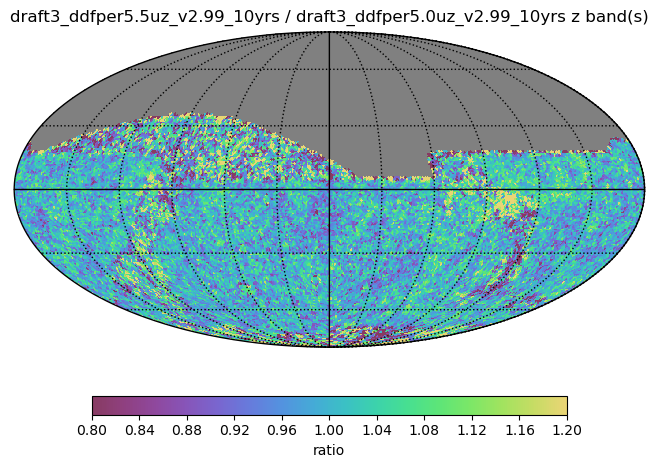

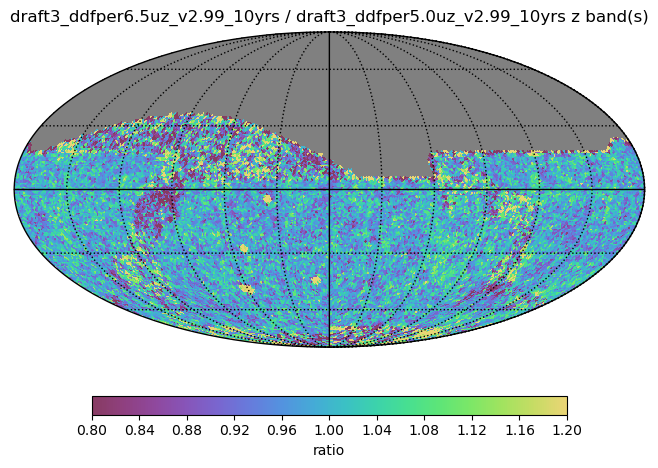

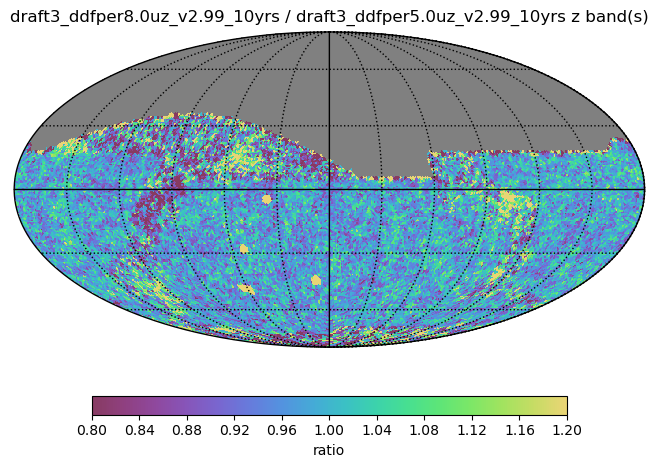

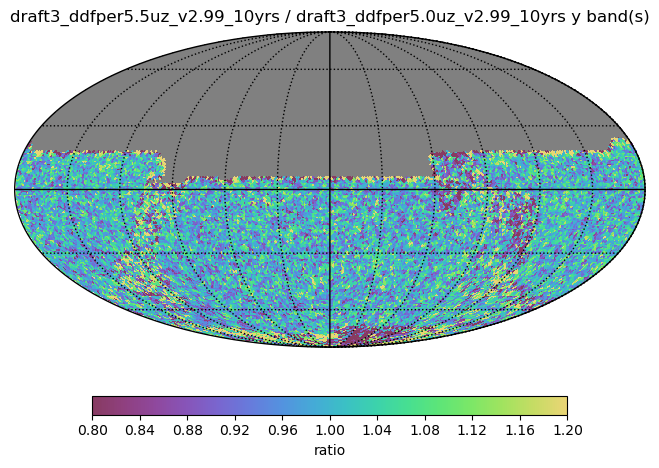

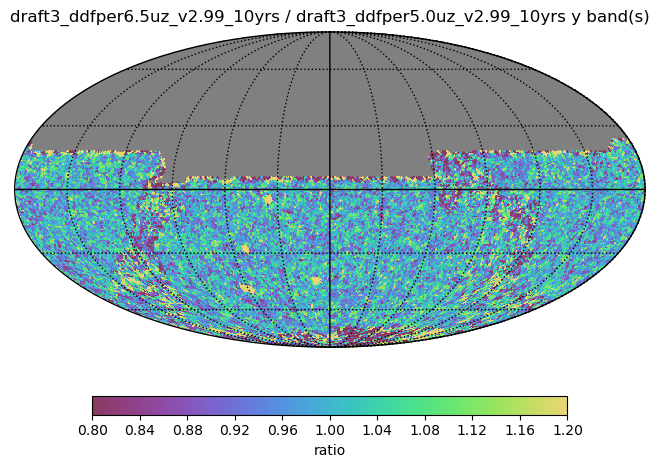

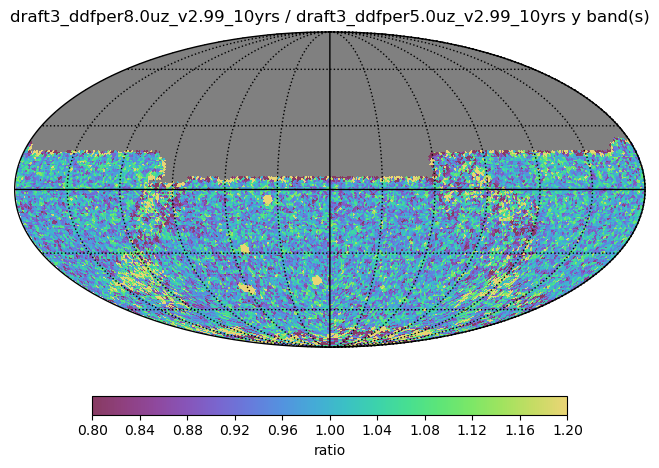

In [258]:
ph = maf.PlotHandler(outDir=outDir, thumbnail=False, figformat='png')
baseline_run = 'draft3_ddfper5.0uz_v2.99_10yrs'
for f in filterlist:
    for r in draft_ddf[2::2]:
        plotDict = {'colorMin': 0.8, 'colorMax': 1.2, 'xlabel': 'ratio',
                    'title': f'{r} / {baseline_run} {f} band(s)'}
        tmp = maf.createEmptyMetricBundle()
        tmp.slicer = s
        tmp.metricValues = bundles[r][f].metricValues / bundles[baseline_run][f].metricValues
        ph.setMetricBundles([tmp])
        ph.plot(maf.HealpixSkyMap(), plotDicts=plotDict)

There aren't a lot of obvious bigger changes in the spatial distribution of these visits, either per filter or in all filters, between these runs. There is some patchy variation in the background galactic plane (dusty plane) that varies between DDF fractions, but this is likely random (the number of visits is lower here). There is nothing obvious to me, so let's check the numbers (the fraction of recovered/identified events, at least) :

In [273]:
# Values of the metrics where the trend is puzzling
# Note that the total XRB and microlensing input populations are 10,000 events each
# The KNePopMetric input population is 50,000 events
# The NEO and Trojan populations are 5k orbits each
metrics = ['Fraction detected of total XRBPopMetric__early_detect  UserPointsSlicer',
          'Fraction detected of total (mean) KNePopMetric_single__ztfrest_simple single model UserPointsSlicer',
          'Fraction detected of total (mean) MicrolensingMetric_detect tE 20_30 days UserPointsSlicer', 
          'FractionPop Lightcurve Inversion NEO H=19.0',
          'FractionPop Lightcurve Inversion Trojan H=15.0']
summaries.loc[these_runs, metrics]

metric                           Fraction detected of total XRBPopMetric__early_detect  UserPointsSlicer  \
run                                                                                                        
baseline_v2.2_10yrs                                                         0.1921                         
draft2_rw0.9_uz_v2.99_10yrs                                                 0.1950                         
draft2_rw0.9_v2.99_10yrs                                                    0.1946                         
draft3_ddfper5.0uz_v2.99_10yrs                                              0.1933                         
draft3_ddfper4.0uzy_v2.99_10yrs                                             0.2025                         
draft3_ddfper5.5uz_v2.99_10yrs                                              0.1920                         
draft3_ddfper5.0uzy_v2.99_10yrs                                             0.1976                         
draft3_ddfper6.5uz_v2.99_10yrs                                              0.1994                         
draft3_ddfper5.5uzy_v2.99_10yrs                                             0.1911                         
draft3_ddfper8.0uz_v2.99_10yrs                                              0.1970                         
draft3_ddfper7.0uzy_v2.99_10yrs                                             0.1934                         

metric                           Fraction detected of total (mean) KNePopMetric_single__ztfrest_simple single model UserPointsSlicer  \
run                                                                                                                                    
baseline_v2.2_10yrs                                                        0.01060                                                     
draft2_rw0.9_uz_v2.99_10yrs                                                0.01056                                                     
draft2_rw0.9_v2.99_10yrs                                                   0.01066                                                     
draft3_ddfper5.0uz_v2.99_10yrs                                             0.01132                                                     
draft3_ddfper4.0uzy_v2.99_10yrs                                            0.01006                                                     
draft3_ddfper5.5uz_v2.99_10yrs                                             0.01102                                                     
draft3_ddfper5.0uzy_v2.99_10yrs                                            0.01004                                                     
draft3_ddfper6.5uz_v2.99_10yrs                                             0.01152                                                     
draft3_ddfper5.5uzy_v2.99_10yrs                                            0.00990                                                     
draft3_ddfper8.0uz_v2.99_10yrs                                             0.01114                                                     
draft3_ddfper7.0uzy_v2.99_10yrs                                            0.01060                                                     

metric                           Fraction detected of total (mean) MicrolensingMetric_detect tE 20_30 days UserPointsSlicer  \
run                                                                                                                           
baseline_v2.2_10yrs                                                         0.3212                                            
draft2_rw0.9_uz_v2.99_10yrs                                                 0.3239                                            
draft2_rw0.9_v2.99_10yrs                                                    0.3290                                            
draft3_ddfper5.0uz_v2.99_10yrs                                              0.3269                                            
draft3_ddfper4.0uzy_v2.99_10yrs                                 

From here, it looks like these are likely to be within noise variations. For further information, it would be necessary to dig deeper into each individual event to see what happened. It is likely that it would be worthwhile to run the metrics with a variation of random seeds to further test natural variance. 